In [16]:
from ecmwf.opendata import Client
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
client = Client()

client.retrieve(
    date=20230718,
    time=12,
    step=[step for step in range(0, 360, 6)],
    stream="enfo",
    param=["2t"],
    target="data.grib2",
)

Doc here: https://github.com/ecmwf/ecmwf-opendata<br>
<br>And here:<br> https://events.ecmwf.int/event/296/contributions/3248/attachments/1883/3385/UEF2022_Vuckovic.pdf<br>
<br>And here, too:<br> https://pypi.org/project/ecmwf-opendata/<br>
<br>More: https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts

In [18]:
# ds = xr.open_dataset('data.grib2', engine='cfgrib', 
#                      backend_kwargs={'filter_by_keys':{'typeOfLevel': 'heightAboveGround','level':2}})
# ds = xr.open_dataset('data.grib2', engine='cfgrib', 
#                      backend_kwargs={'filter_by_keys':{'typeOfLevel':'isobaricInhPa', 'level': 500}})

ds = xr.open_dataset('data.grib2', engine='cfgrib',
                      backend_kwargs={'filter_by_keys':{'dataType': 'pf', 'typeOfLevel': 'heightAboveGround','level':2}})


Ignoring index file 'data.grib2.9810b.idx' older than GRIB file


In [19]:
ds

<xarray.Dataset>
Dimensions:            (number: 50, step: 60, latitude: 451, longitude: 900)
Coordinates:
  * number             (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 0 days 00:00:00 ... 14 days 18:...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude          (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time         (step) datetime64[ns] ...
Data variables:
    t2m                (number, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-07-18T20:14 GRIB to CDM+CF via cfgrib-0.9.1...

In [20]:
ens_temps = ds.t2m.sel(latitude=32.90, longitude=-97.04, method='nearest')

In [21]:
df = ens_temps.to_dataframe('temp')
df.dropna(inplace=True)
df.reset_index(inplace=True)
df['temp'] = (df['temp'] - 273.15) * 9/5 + 32
df

,number,step,time,heightAboveGround,latitude,longitude,valid_time,temp
0,1,0 days 00:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-07-18 12:00:00,83.967972
1,1,0 days 06:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-07-18 18:00:00,101.534393
2,1,0 days 12:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-07-19 00:00:00,102.495918
3,1,0 days 18:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-07-19 06:00:00,87.602737
4,1,1 days 00:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-07-19 12:00:00,82.358963
...,...,...,...,...,...,...,...,...
2995,50,13 days 18:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-08-01 06:00:00,91.634117
2996,50,14 days 00:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-08-01 12:00:00,85.514404
2997,50,14 days 06:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-08-01 18:00:00,104.911484
2998,50,14 days 12:00:00,2023-07-18 12:00:00,2.0,32.8,-97.2,2023-08-02 00:00:00,104.503006


<Axes: title={'center': 'ECMWF EPS Temperature'}, xlabel='valid_time'>

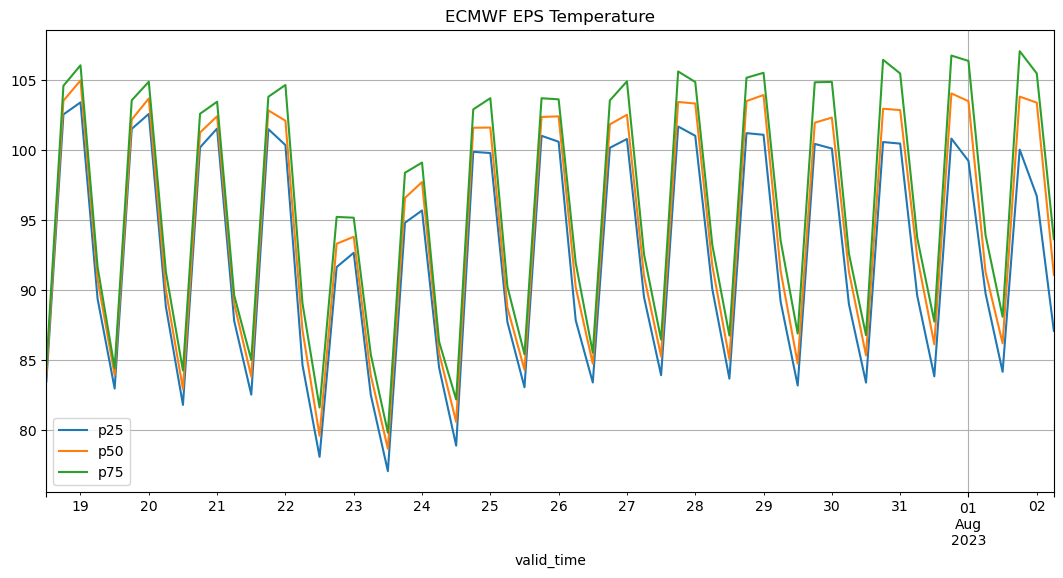

In [22]:
df_ens_members = df.groupby('valid_time')
p25 = df_ens_members['temp'].quantile(.25)
p50 = df_ens_members['temp'].quantile(.50)
p75 = df_ens_members['temp'].quantile(.75)
std = df_ens_members['temp'].std()

df_ens_summary = pd.DataFrame({
    'p25': p25,
    'p50': p50,
    'p75': p75,
    'std': std,
})
df_ens_summary.plot(use_index=True, y=['p25', 'p50', 'p75'], figsize=(13,6),
                        grid=True, title='ECMWF EPS Temperature',)

<Axes: title={'center': 'ECMWF EPS Std Deviation of Temperature'}, xlabel='valid_time'>

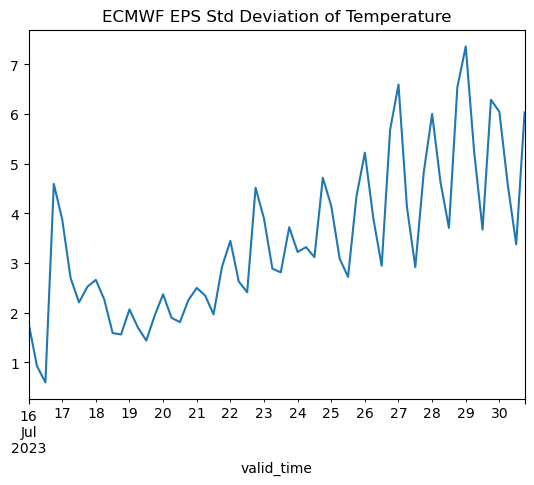

In [14]:
df_ens_summary['std'].plot(title='ECMWF EPS Std Deviation of Temperature')